In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image as im
from sklearn import svm
from sklearn.datasets._samples_generator import make_blobs
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import os
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import zipfile


Kernel: linear
Train Accuracy: 0.93
Test Accuracy: 0.91


<ipython-input-2-1fc7076bea3c>:39: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=50, label='Test')


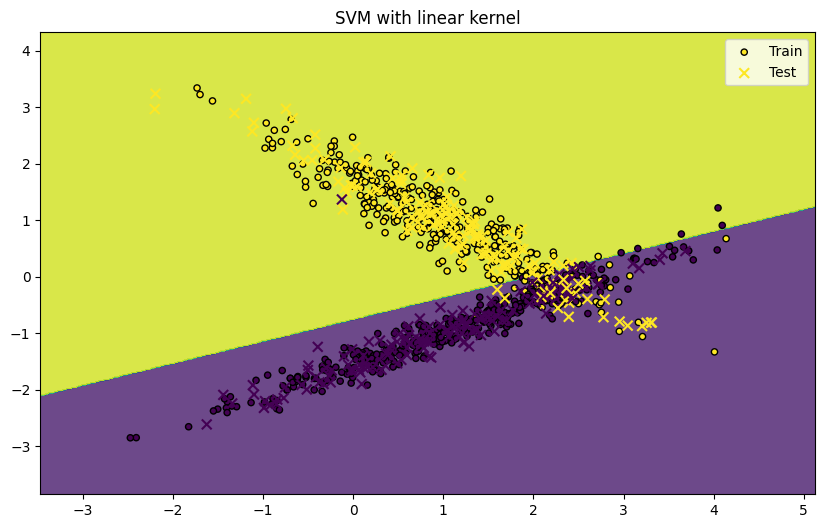


Kernel: poly
Train Accuracy: 0.94
Test Accuracy: 0.90


<ipython-input-2-1fc7076bea3c>:39: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=50, label='Test')


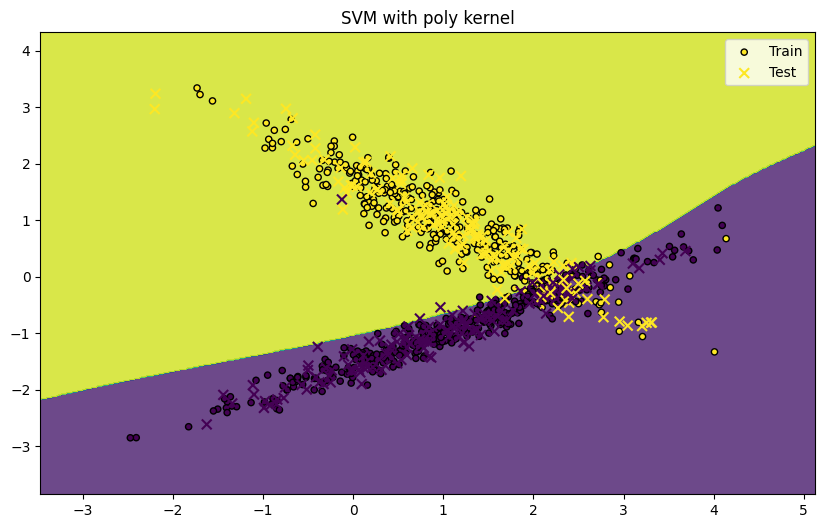


Kernel: rbf
Train Accuracy: 0.94
Test Accuracy: 0.92


<ipython-input-2-1fc7076bea3c>:39: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=50, label='Test')


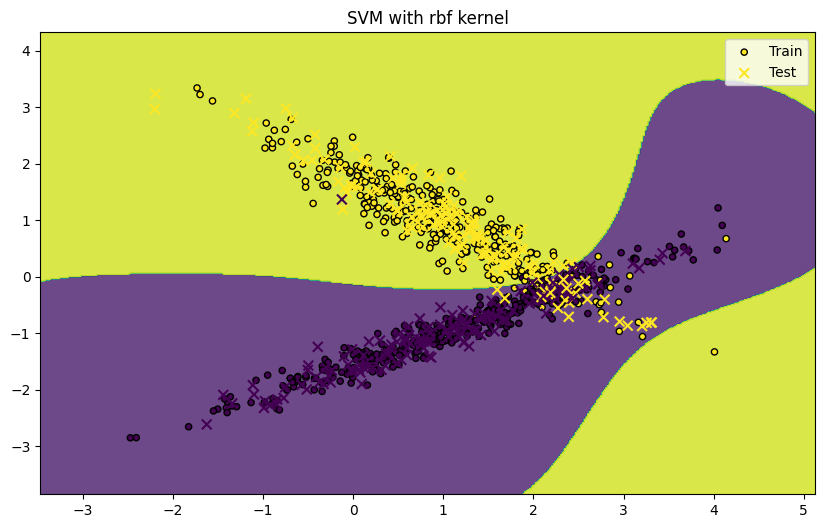


Kernel: sigmoid
Train Accuracy: 0.93
Test Accuracy: 0.90


<ipython-input-2-1fc7076bea3c>:39: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=50, label='Test')


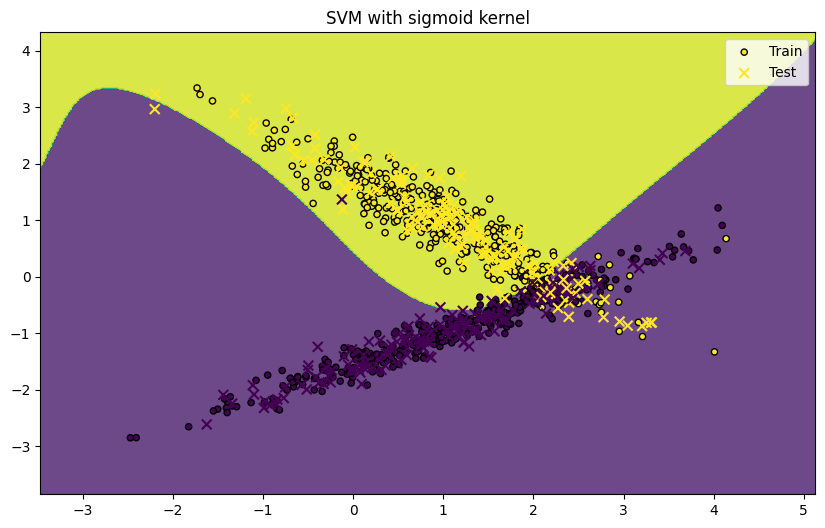

In [2]:
# Step 1: Generate synthetic data
def generate_data(n_samples=1000, n_features=2, n_classes=2, random_state=42):
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=n_classes, random_state=random_state)
    return X, y

# Step 2: Split the data
def split_data(X, y, test_size=0.3, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Step 3: Train SVM models
def train_svm(X_train, y_train, kernel='linear', C=1.0, gamma='scale'):
    model = SVC(kernel=kernel, C=C, gamma=gamma)
    model.fit(X_train, y_train)
    return model

# Step 4: Evaluate and visualize
def evaluate_and_visualize(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Train Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")

    # Plot decision boundary
    h = .02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=20, label='Train')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=50, label='Test')
    plt.title(f'SVM with {model.kernel} kernel')
    plt.legend()
    plt.show()

# Generate data
X, y = generate_data(n_samples=1000, n_features=2, n_classes=2)

# Split data
X_train, X_test, y_train, y_test = split_data(X, y)

# Train and visualize SVM with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    print(f"\nKernel: {kernel}")
    model = train_svm(X_train, y_train, kernel=kernel)
    evaluate_and_visualize(model, X_train, y_train, X_test, y_test)


In [3]:
# بارگیری داده‌ها از USPS
from sklearn.datasets import fetch_openml
usps = fetch_openml(name='usps', version=2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(usps.data, usps.target, test_size=0.3, random_state=42)

from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"Kernel: {kernel}, Accuracy: {accuracy:.2f}")

# مقایسه با شبکه عصبی
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
nn_accuracy = nn_model.score(X_test, y_test)
print(f"Neural Network Accuracy: {nn_accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Kernel: linear, Accuracy: 0.95
Kernel: poly, Accuracy: 0.98
Kernel: rbf, Accuracy: 0.97
Kernel: sigmoid, Accuracy: 0.78
Neural Network Accuracy: 0.97


Checking folder: /content/LP/LP/2
Reading image: /content/LP/LP/2/79_17J47222_3776_8_0.76_2_18765.bmp
Reading image: /content/LP/LP/2/253_12D24668_3433_2_0.90_2_13144.bmp
Reading image: /content/LP/LP/2/272_15J52668_4182_5_0.81_2_19710.bmp
Reading image: /content/LP/LP/2/89_96I24468_105_4_0.91_2_14381.bmp
Reading image: /content/LP/LP/2/113_94,22622_2477_7_0.75_2_17370.bmp
Reading image: /content/LP/LP/2/256_11S79421_1138_7_0.71_3_17320.bmp
Reading image: /content/LP/LP/2/240_13,96222_2574_6_0.90_2_16515.bmp
Reading image: /content/LP/LP/2/123_12G62588_8544_5_0.87_2_15179.bmp
Reading image: /content/LP/LP/2/223_83,32833_8669_5_0.83_2_14922.bmp
Reading image: /content/LP/LP/2/172_12G62588_8627_5_0.87_2_15125.bmp
Reading image: /content/LP/LP/2/214_12D24668_3447_4_0.90_2_14342.bmp
Reading image: /content/LP/LP/2/235_57,74221_632_6_0.87_2_16179.bmp
Reading image: /content/LP/LP/2/101_12G62588_8603_5_0.89_2_15317.bmp
Reading image: /content/LP/LP/2/281_12G62588_8577_2_0.88_2_12973.bmp
Read

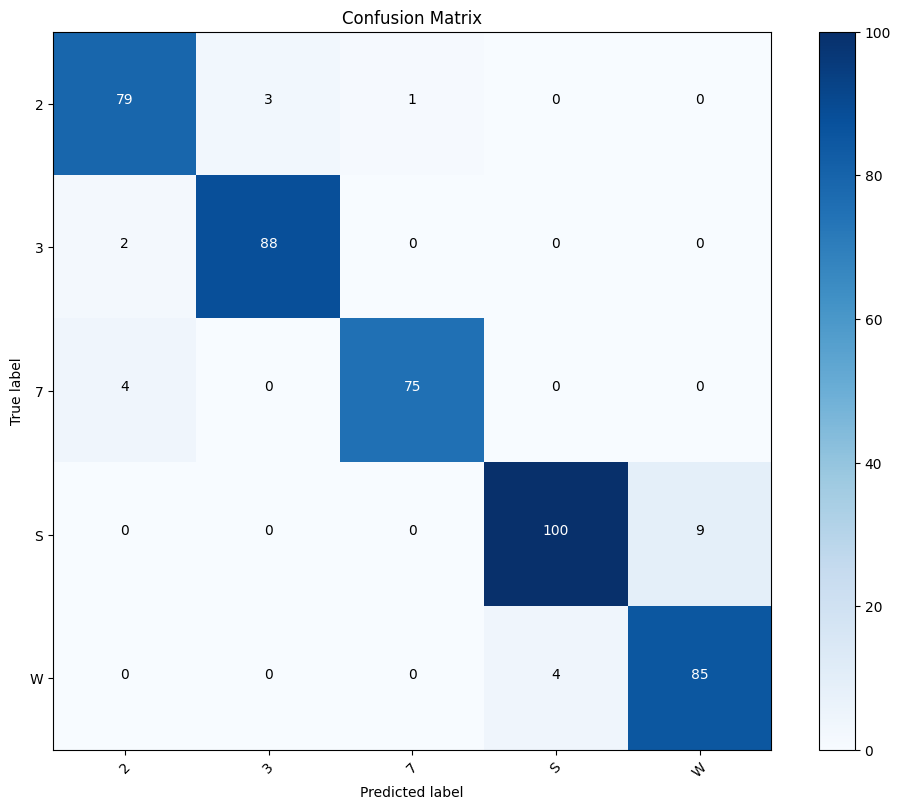

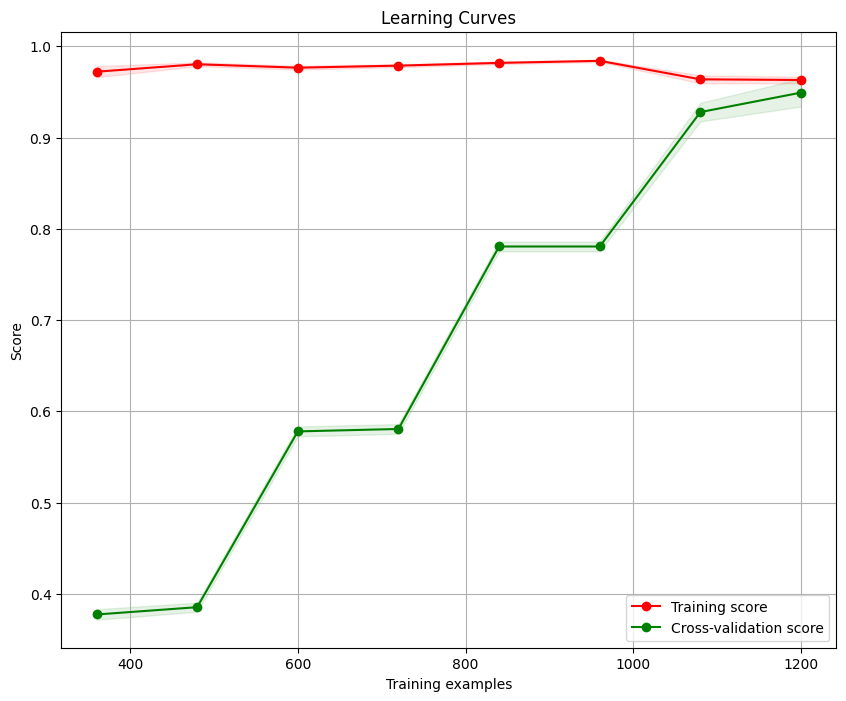

In [9]:
# Step 1: Unzip the LP.zip file
with zipfile.ZipFile('LP.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/LP')

# Step 2: Load and preprocess the data
def load_images_from_folders(base_folder, target_size):
    images = []
    labels = []
    folders = ['2', '3', '7', 'S', 'W']  # Explicitly define the folder names
    for folder in folders:
        folder_path = os.path.join(base_folder, folder)
        print(f"Checking folder: {folder_path}")
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.endswith(".bmp"):
                    img_path = os.path.join(folder_path, filename)
                    print(f"Reading image: {img_path}")
                    try:
                        img = Image.open(img_path)
                        img = np.array(img)  # Convert PIL image to numpy array
                        if img is not None:
                            img = resize(img, target_size, anti_aliasing=True)  # Resize image
                            images.append(img.flatten())  # Flatten image and append to list
                            labels.append(folder)  # Use the folder name as the label
                    except Exception as e:
                        print(f"Error loading image {img_path}: {e}")
        else:
            print(f"Folder not found: {folder_path}")
    if not images:
        raise ValueError("No images loaded. Please check the folder structure and file paths.")
    return np.array(images), np.array(labels)

# Define the target image size
target_size = (128, 128)  # Change as per your requirements

# Define the directory containing images
base_folder = '/content/LP/LP'

# Load images and labels
X, y = load_images_from_folders(base_folder, target_size)

# Check if images are loaded correctly
print(f"Loaded {len(X)} images with labels: {np.unique(y)}")

# Normalize pixel values to the range 0-1
X = X / 255.0

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train SVM model
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))

# Step 6: Plot the results
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=np.unique(y), title='Confusion Matrix')
plt.show()

# Step 7: Plot learning curves
def plot_learning_curves(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, validation_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.figure(figsize=(10, 8))
    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Plot learning curves
plot_learning_curves(model, X, y)